### Import All Libraries

In [620]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Read Dataset

In [621]:
df = pd.read_csv("titanic.csv")
df1 = df

### Data Preprocessing

#### Melihat nilai null value

In [622]:
jumlah_null = df.isnull().sum()
jumlah_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

bisa dilihat ada beberapa nilai null value, untuk itu null value ini perlu ditangani

#### Penanganan null value

Penanganan null value untuk Age

In [623]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

Penanganan null value untuk Cabin<br>
Karena data cabin banyak yang null, yaitu sekitar 77%, maka kolum ini di drop

In [624]:
df.drop("Cabin", axis=1, inplace=True)

Penganan null value untuk Embarked

In [625]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

Melihat null value lagi

In [626]:
jumlah_null_new = df.isnull().sum()
jumlah_null_new

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Bisa dilihat bahwa semya null value sudah ditangani

Mengubah Age menjadi tipe data categorical integer

In [627]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df["Embarked"] = df["Embarked"].map( {'S' : 0, 'C' : 1, 'Q' : 2})

In [628]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


drop kolom passagerId, Name, dan Ticket

In [629]:
df.drop(["PassengerId","Name","Ticket"], axis=1, inplace=True)

In [630]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


Lakukan Bining untuk Fare<br>
bagi menjadi 3 bagian, yaitu low (0), mid (1), hight (2)

In [631]:
print("nilai max: ", df["Fare"].max())
print("nilai min: ", df["Fare"].min())

nilai max:  512.3292
nilai min:  0.0


In [632]:
df.loc[ df['Fare'] <= 170, 'Fare'] = 0
df.loc[(df['Fare'] > 170) & (df['Fare'] <= 340), 'Fare'] = 1
df.loc[ df['Fare'] > 340, 'Fare'] = 3

ubah tipe Age dan Fare ke int

In [633]:
df["Age"] = df["Age"].astype(int)
df["Fare"] = df["Fare"].astype(int)

In [634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int32
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int32
 7   Embarked  891 non-null    int64
dtypes: int32(3), int64(5)
memory usage: 45.4 KB


### Feature Selection

Untuk feature selection menggunakan correlation

In [635]:
df.corr()["Survived"]

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.067809
SibSp      -0.035322
Parch       0.081629
Fare        0.104970
Embarked    0.106811
Name: Survived, dtype: float64

<Axes: >

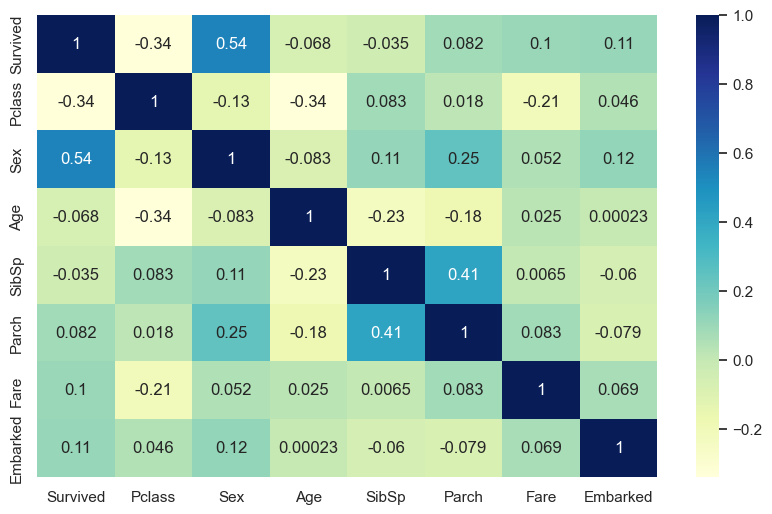

In [636]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

feature Selection 1 using f_cassif

In [637]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

data1 = df.copy()
fs = SelectKBest(score_func=f_classif, k=5)
Selected_df = fs.fit_transform(data1.iloc[:,1:], data1["Survived"])

feature selection 2 using chi2

In [638]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data2 = df.copy()
fs = SelectKBest(score_func=chi2, k=5)
Selected_df_2 = fs.fit(data1.iloc[:,1:], data1["Survived"])
selected = Selected_df_2.get_support()
selected

array([ True,  True,  True, False, False,  True,  True])

In [639]:
colums_choosed = [0]
for i in range(len(selected)):
    if selected[i] == True:
        # i + 1 karena column 0 adalah survived
        colums_choosed.append(i+1)

In [640]:
data2 = data2.iloc[:, colums_choosed]
data2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22,0,0
1,1,1,1,38,0,1
2,1,3,1,26,0,0
3,1,1,1,35,0,0
4,0,3,0,35,0,0
...,...,...,...,...,...,...
886,0,2,0,27,0,0
887,1,1,1,19,0,0
888,0,3,1,29,0,0
889,1,1,0,26,0,1


### Make Model

#### Model 1 - Using DF (not using feature selection)

In [641]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [642]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [643]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


#### Model 2 - Using Data 1

In [644]:
X_train, X_test, y_train, y_test = train_test_split(Selected_df, data1["Survived"], test_size=0.2, random_state=42)

In [645]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [646]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


#### Model 3 - Using Data 2

In [647]:
X = data2.drop(["Survived"], axis=1)
y = data2["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [648]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [649]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79
